في هذا التدريب العملي سنصنف المدن اعتمادا على محتوى التغريدات. وتلك هي نفس دراسة الحالة التي أجريناها في المبحث الأول من هذا الكتاب. وقد كنا في المرة الأولى حين أجرينا التجربة معتمدين على مجموعة تدريب واحدة، ومجموعة اختبار واحدة. ولكننا الآن أكثر وعيا بمسألة *فرط التخصيص over-fitting* في بيانات الاختبار. ولذلك سنستعمل هنا التحقق المتقاطع cross-validation.

In [1]:
from text_analytics import TextAnalytics
import os
import pandas as pd

ai = TextAnalytics()
ai.data_dir = os.path.join("..", "data")
print("Done!")

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


Done!


يكرر الكود البرمجي أدناه تشغيل ثلاثة نماذج من نماذجنا السابقة: المدن (المحتوى)، والمؤلف (الأسلوب)، والمشاعر (تقييم الفنادق). لكنه معلّق لأنه سيستغرق وقتا لتشغيل تلك النماذج.

In [2]:
files = [("content", "City", "sociolinguistics.english_cities.gz"),
         ("style", "Author", "stylistics.authorship_1850.gz"),
         ("sentiment", "Rating", "economic.hotels_as_reviews.gz")
        ]

for features, labels, file in files:

    print(file, features, labels)
    #df = pd.read_csv(os.path.join(ai.data_dir, file))
    #print(df)
    
    #if features == "content":
        #ai.phrases = ai.deserialize("phrases", "sociolinguistics.english_all.gz" + ".phrases.json")
        #ai.tfidf_vectorizer = ai.deserialize("tfidf_model", "sociolinguistics.english_all.gz" + ".tfidf.json")

    
    #label = labels
    #print(set(df.loc[:,label].values))

    #report = ai.shallow_classification(df, labels = label, features=features, cv=True, classifier='lr')
    #print(report)

sociolinguistics.english_cities.gz content City
stylistics.authorship_1850.gz style Author
economic.hotels_as_reviews.gz sentiment Rating


سنأخذ بدلا من ذلك نتائج تجربة التحقق المتقاطع التي قد أجريناها من قبل. وقد حددنا أدناه المتغيرات بالنتائج بوصفها قوائم من القيم (واحدة لكل طيّة fold).

In [3]:
authors_precision_weighted = [0.95043823, 0.97918549, 0.95869462, 0.98378707, 0.98832112, 0.98531879, 0.9835866 , 0.98952226, 0.98592662, 0.95607906]
authors_recall_weighted = [0.94625, 0.97875, 0.954375, 0.98375, 0.988125,  0.985, 0.983125, 0.989375, 0.985625, 0.95497186]
authors_f1_weighted = [0.9449539, 0.97866568, 0.95285667, 0.98337278, 0.98814036, 0.98491795, 0.98287422, 0.98936663, 0.98543404, 0.9517517]

cities_precision_weighted = [0.89376411, 0.92287049, 0.9174158, 0.92567437, 0.92276127, 0.92029117, 0.91135966, 0.91678499, 0.92325308, 0.91998688]
cities_recall_weighted = [0.89088849, 0.92194894, 0.91541692, 0.92461508, 0.9210158, 0.9190162, 0.91068453, 0.91581684, 0.9221489, 0.91908285]
cities_f1_weighted = [0.89060494, 0.92199104, 0.91529101, 0.92472337, 0.92123068, 0.91947138, 0.91042858, 0.91577582, 0.92215407, 0.91896835]

hotels_precision_weighted = [0.99812437, 1., 0.99811841, 0.99443893, 0.99433872, 0.99812437, 1., 0.99624715, 0.99622642, 1.]
hotels_recall_weighted = [0.99811321, 1., 0.99811321, 0.99433962, 0.99433962, 0.99811321, 1., 0.99622642, 0.99622642, 1.]
hotels_f1_weighted = [0.9981147, 1., 0.99811169, 0.99435289, 0.99433508, 0.9981147 , 1., 0.99622031, 0.99622642, 1.]

dialects_precision_weighted = [0.93562948, 0.93726996, 0.93769712, 0.9356366, 0.93390343, 0.93760809, 0.93521281, 0.93707733, 0.93797433, 0.93496438] 
dialects_recall_weighted = [0.93562232, 0.93716376, 0.93749433, 0.93562037, 0.93383709, 0.93749433, 0.93519722, 0.93713163, 0.93794771, 0.93486474]
dialects_f1_weighted = [0.93559374, 0.937191, 0.93755789, 0.93561103, 0.93384442, 0.93753896, 0.93519424, 0.93707399, 0.93792176, 0.93488884]

print("Loaded results!")

Loaded results!


لنمثل ذلك بيانيا لنرى مدى ثبات النتائج.

       Score     Metric
0   0.950438  Precision
1   0.979185  Precision
2   0.958695  Precision
3   0.983787  Precision
4   0.988321  Precision
5   0.985319  Precision
6   0.983587  Precision
7   0.989522  Precision
8   0.985927  Precision
9   0.956079  Precision
10  0.946250     Recall
11  0.978750     Recall
12  0.954375     Recall
13  0.983750     Recall
14  0.988125     Recall
15  0.985000     Recall
16  0.983125     Recall
17  0.989375     Recall
18  0.985625     Recall
19  0.954972     Recall
20  0.944954         F1
21  0.978666         F1
22  0.952857         F1
23  0.983373         F1
24  0.988140         F1
25  0.984918         F1
26  0.982874         F1
27  0.989367         F1
28  0.985434         F1
29  0.951752         F1


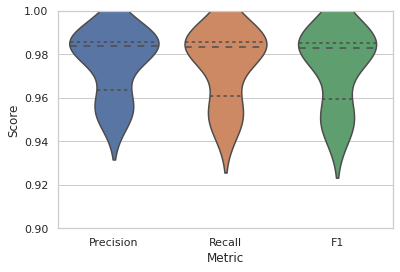

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set_theme(style="whitegrid")

authors_df = pd.DataFrame([authors_precision_weighted + authors_recall_weighted + authors_f1_weighted]).T
authors_df.loc[:,"Metric"] = ["Precision" for i in range(10)] + ["Recall" for i in range(10)] + ["F1" for i in range(10)]
authors_df.columns = ["Score", "Metric"]
print(authors_df)

g = sns.violinplot(x="Metric", y="Score", data=authors_df, inner="quartile")
g.set_ylim(0.9, 1.0)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
rcParams['font.size'] = 15

يبين مخطط فايولن violin plot أن في كل 10 طيات يتراوح أداء المصنف عادة بين 0.96 و0.98. بمعنى أن الأداء يقتصر على جزء واحد من مجموعة البيانات.

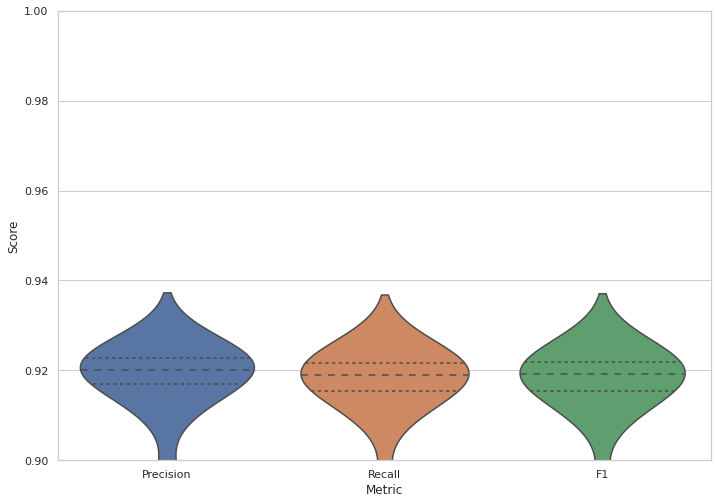

In [5]:
cities_df = pd.DataFrame([cities_precision_weighted + cities_recall_weighted + cities_f1_weighted]).T
cities_df.loc[:,"Metric"] = ["Precision" for i in range(10)] + ["Recall" for i in range(10)] + ["F1" for i in range(10)]
cities_df.columns = ["Score", "Metric"]

hotels_df = pd.DataFrame([hotels_precision_weighted + hotels_recall_weighted + hotels_f1_weighted]).T
hotels_df.loc[:,"Metric"] = ["Precision" for i in range(10)] + ["Recall" for i in range(10)] + ["F1" for i in range(10)]
hotels_df.columns = ["Score", "Metric"]

g = sns.violinplot(x="Metric", y="Score", data=cities_df, inner="quartile")
g.set_ylim(0.9, 1.0)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
rcParams['font.size'] = 15

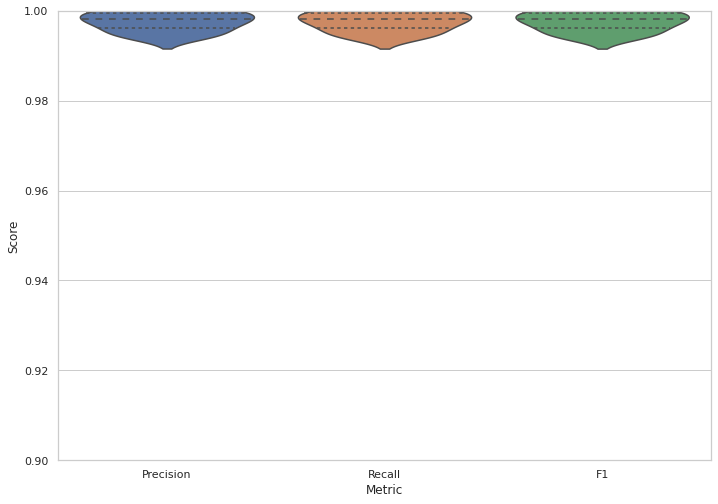

In [6]:
g = sns.violinplot(x="Metric", y="Score", data=hotels_df, inner="quartile")
g.set_ylim(0.9, 1.0)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
rcParams['font.size'] = 15

وتوضح لنا هذه التمثيلات البيانية أن المصنفات متسقة تماما. ولكن يمكننا أيضا أن نستعمل اختبار دلالة إحصائي لمعرفة ما إذا كانت قيم كل طية تأتي من مجتمعات مختلفة من البيانات. فإذا كانت القيمة الاحتمالية  p-value أعلى من  0.10 فيمكننا اعتبار العشر طيات مجتمع بيانات لغوي واحد. وكما توقعنا من الرسومات البيانية، فإن النتائج إحصائيا تتسم بالاتساق أيضا.

In [7]:
from scipy.stats import ttest_1samp
import statistics

cities_significance = ttest_1samp(cities_f1_weighted, statistics.mean(cities_f1_weighted))
print("Cities", cities_significance)

authors_significance = ttest_1samp(authors_f1_weighted, statistics.mean(authors_f1_weighted))
print("Authors", authors_significance)

hotels_significance = ttest_1samp(hotels_f1_weighted, statistics.mean(hotels_f1_weighted))
print("Hotels", hotels_significance)

Cities Ttest_1sampResult(statistic=0.0, pvalue=1.0)
Authors Ttest_1sampResult(statistic=2.0423370682263383e-14, pvalue=0.9999999999999841)
Hotels Ttest_1sampResult(statistic=-1.6054844046763062e-13, pvalue=0.9999999999998754)


دعونا نرسم مخططا بيانيا يعرض كل درجات مقياس-ف مع بعضها متضمنا ذلك التحقق المتقاطع لمصنف اللهجة الذي أجريناه باستعمال الأبنية بوصفها خصائص.

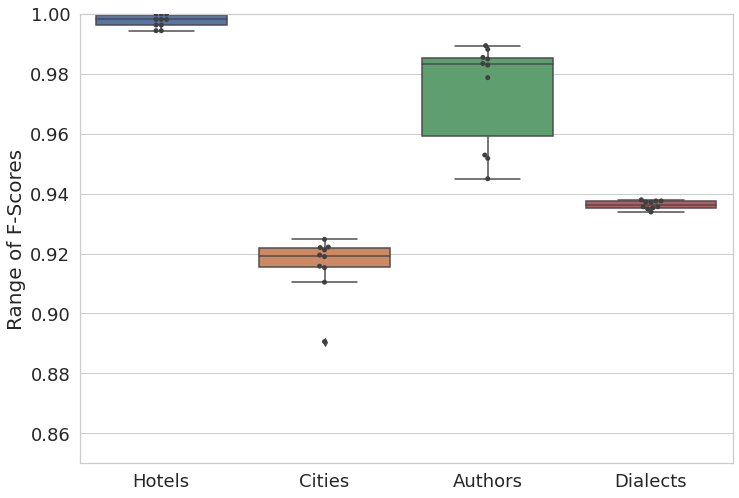

In [8]:
all_df = pd.DataFrame([hotels_f1_weighted + cities_f1_weighted + authors_f1_weighted + dialects_f1_weighted]).T
all_df.loc[:,"Type"] = ["Hotels" for i in range(10)] + ["Cities" for i in range(10)] + ["Authors" for i in range(10)] + ["Dialects" for i in range(10)]
all_df.columns = ["Score", "Type"]

#g = sns.boxplot(x="Type", y="Score", data=all_df, inner="quartile")
ax = sns.boxplot(x="Type", y="Score", data=all_df)
ax = sns.swarmplot(x="Type", y="Score", data=all_df, color=".25")
ax.set_ylim(0.85, 1.0)

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
rcParams['font.size'] = 15

plt.xlabel("",size=20)
plt.ylabel("Range of F-Scores",size=20)
plt.tick_params(axis='both', which='major', labelsize=18)